In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Para entrenar
from sklearn.preprocessing import MinMaxScaler # Para normalizar
from sklearn.metrics import mean_absolute_error # Para evaluar el error absoluto
import missingno as msno

#redes neuronales
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation



In [3]:
df1 = pd.read_excel("VENTAS2.xlsx")


In [91]:
df = df1.copy()

In [92]:
df

,Bodega,Fecha,Nombre,Codigo,Articulo,Modelo,Marca,Clase,SubGrupo,Cantidad,...,Neto,Iva,Vta con Iva,CostoPromedio,CostoTotal,CANAL,Ciudad,Contibucion,TIPO,GRUPO
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272928,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272929,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272930,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272931,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272933 entries, 0 to 272932
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Bodega         137625 non-null  object        
 1   Fecha          137625 non-null  datetime64[ns]
 2   Nombre         137625 non-null  object        
 3   Codigo         137625 non-null  object        
 4   Articulo       137625 non-null  object        
 5   Modelo         133186 non-null  object        
 6   Marca          135029 non-null  object        
 7   Clase          135063 non-null  object        
 8   SubGrupo       134447 non-null  object        
 9   Cantidad       137625 non-null  float64       
 10  Precio         137625 non-null  float64       
 11  Descuento      137625 non-null  float64       
 12  Neto           137625 non-null  float64       
 13  Iva            137625 non-null  float64       
 14  Vta con Iva    137625 non-null  float64       
 15  

In [94]:
df = df.dropna(how='all')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137625 entries, 5712 to 272932
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Bodega         137625 non-null  object        
 1   Fecha          137625 non-null  datetime64[ns]
 2   Nombre         137625 non-null  object        
 3   Codigo         137625 non-null  object        
 4   Articulo       137625 non-null  object        
 5   Modelo         133186 non-null  object        
 6   Marca          135029 non-null  object        
 7   Clase          135063 non-null  object        
 8   SubGrupo       134447 non-null  object        
 9   Cantidad       137625 non-null  float64       
 10  Precio         137625 non-null  float64       
 11  Descuento      137625 non-null  float64       
 12  Neto           137625 non-null  float64       
 13  Iva            137625 non-null  float64       
 14  Vta con Iva    137625 non-null  float64       
 15  Co

In [96]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Fecha,137625,2019-08-10 18:49:10.783651328,2018-01-02 00:00:00,2018-11-28 00:00:00,2019-08-22 00:00:00,2020-06-04 00:00:00,2023-03-20 00:00:00,NaN
Cantidad,137625.0,164.938514,-50000.0,1.0,4.0,12.0,600000.0,3816.36667
Precio,137625.0,28.39278,-38500.0,5.58,11.51,23.0,78912.7,373.492444
Descuento,137625.0,2.002145,0.0,0.0,0.0,0.0,16974.75,70.629156
Neto,137625.0,608.472028,-580986.0,13.97,46.8,197.8,931200.0,7703.720917
Iva,137625.0,58.230834,-69718.32,0.0,0.77004,7.5816,111744.0,916.707185
Vta con Iva,137625.0,666.702862,-650704.32,14.73,50.37984,208.7232,1042944.0,8612.733746
CostoPromedio,137625.0,24.878945,0.0,4.14716,8.427775,16.497486,38554.39755,141.454764
CostoTotal,137625.0,513.098176,-534155.5562,10.07,33.931802,151.30254,812446.237317,7056.379137
Contibucion,45714.0,57.933235,-203649.262169,3.28994,10.436411,35.316789,118753.762683,1556.750762


In [97]:
df['Bodega'].unique()

array(['Central', 'Compras en Consignacion', 'Consignacion Mega Kiwy',
       'Importaciones', 'Sala Showroom', 'Feria',
       'Consignacion Termalimex', 'Consignacion Marcimex',
       'Consignacion De Prati', 'Consignacion Jaher UIO',
       'Consignacion TVentas', 'Consignacion Icesa', 'Muestras',
       'Sala Showroom Gye', 'Mal Estado', 'Retail',
       'Productos Caja Mal Estado', 'Consignacion Multiclientes',
       'Consignacion PA-CO', 'Consignacion Vega', 'Consignacion Irvix',
       'Ventas Redes', 'Faltante Importaciones',
       'Consignacion Cooprogreso',
       'Consignacion Planta Warenhaus Clase B', 'Productos Exhibicion',
       'Consignacion Planta Warenhaus', 'Tienda Planta'], dtype=object)

In [98]:
df['Fecha'].unique()

<DatetimeArray>
['2018-10-01 00:00:00', '2018-05-16 00:00:00', '2018-01-27 00:00:00',
 '2018-01-02 00:00:00', '2018-01-10 00:00:00', '2018-02-05 00:00:00',
 '2018-02-22 00:00:00', '2018-03-01 00:00:00', '2018-03-05 00:00:00',
 '2018-03-21 00:00:00',
 ...
 '2020-12-19 00:00:00', '2020-12-21 00:00:00', '2020-12-22 00:00:00',
 '2020-12-23 00:00:00', '2020-12-24 00:00:00', '2020-12-28 00:00:00',
 '2020-12-29 00:00:00', '2020-12-30 00:00:00', '2020-12-31 00:00:00',
 '2023-03-20 00:00:00']
Length: 872, dtype: datetime64[ns]

In [99]:
df['Nombre'].unique()

array(['COOPERATIVA DE AHORRO Y CREDITO COOPROGRESO LTDA.',
       'CORPORACIÓN ENSAB INDUSTRIA ECUATORIANA ENSAMBEC S.A',
       'WARENHAUS S.A', ..., 'NAVARRETE CHAMORRO ERIK PAUL',
       'GAMBOA VELEZ MAURICIO DAVID', ' BASANTES SOLIS AIDA FABIOLA'],
      dtype=object)

In [100]:
df['Codigo'].unique()

array(['ING.AR01', 'INGOTR', 'CL45', ..., 'M11930', 'SI23939', 'M33661'],
      dtype=object)

In [101]:
df['Articulo'].unique()

array(['ARRIENDO', 'OTROS INGRESOS 0%', 'CUENTAS POR LIQUIDAR 0%', ...,
       '8806090415975 LED 43" LTV, 4K, SMART, THE SERO QN43LS05TAPXPA SAMSUNG',
       '8806090009143 TABLET SM-T295 NEGRA SAMSUNG',
       'ARMONIA: OLLA BAJA 20 CM + TAPA ROJO'], dtype=object)

In [102]:
df['Modelo'].unique()

array([nan, 'RC5225', 'GRAFITO', ..., 'PAILA HOGAR', 'QN43LS05TAPXPA',
       'SM-T295'], dtype=object)

In [103]:
df['Marca'].unique()

array([nan, 'BLACK+DECKER', 'WARENHAUS', 'SAMSUNG', 'OSTER', 'REMAX',
       'WILMAX', 'EL MAYU', 'UMA', 'FERBA', 'HAIER', 'MBL', 'TAURUS',
       'WARENHAUS MENAJE', 'BAZAR ANTIGUO', 'MONTEFIORI', 'CASA BELLA',
       'SANTINI', 'MIRO M.', 'WEST BEND', 'TOP SOUND', 'MEMBER¨S MARK',
       'SAMURAI', 'RCA', 'SANTYS', 'MAXELL', 'TA"RIKO', 'HOUSE&HOME',
       'DAGA', 'CONAIR', 'SINMARCA', 'FRESKA', 'WH CUISINE', 'ELECTROLUX',
       'YIWU', 'ZENZA', 'BRUMETE', 'WINSOR', 'SABROSOL', 'PERCAOLIVA',
       'TOP COOL', 'WARENHAUS ELECTRICO', 'MARANELO', 'OBLISCO', 'SEILON',
       'MARQUES DOS PALACIOS', 'BELLISCO', 'ORESA', 'HUAWEI', 'UMCO',
       'REMINGTON', 'CONCEPTS', 'SAGEBOOK', 'PANASONIC', 'WANTECH',
       'GIBSON', 'HARMAN KARDON', 'GLOBAL', 'SPECIALE BOLLICINA',
       'ABRILBLEND', 'SUMESA', 'BUY BUY BABY', 'ESTRA', 'MOFI',
       'FARMAENLACE', 'LG', 'TRADING UNLIMITED', 'JAPON', 'THREE HANDS',
       'SANDISK', 'ROLAND', 'TOP DRIVE', 'IBER', 'BETRES', 'BIELA',
       'AMBEV', 

In [104]:
df['Clase'].unique()

array([nan, 'OLLA ARROCERA', 'JUEGO DE SARTENES', 'BLURAY',
       'TEATRO EN CASA', 'PARLANTE', 'LICUADORA', 'PICATODO',
       'BATERIA PORTATIL', 'CABLE', 'AUDIFONO', 'CARGADOR', 'ADAPTADOR',
       'LED', 'EXPRIMIDOR', 'SARTEN', 'TOSTADOR', 'SANDUCHERA',
       'PLANCHA ROPA', 'TETERA', 'BANDEJA', 'TAZON/BOWL',
       'SIDRA ASTURIANA 4.1º', 'CUCHILLO', 'DURAZNOS EN ALMIBAR',
       'COCKTAIL DE FRUTAS EN ALMIBAR', 'MICROONDAS',
       'CALENTADOR D/COMIDA SAMOBAR', 'SET COCINA', 'JUEGO DE OLLAS',
       'OLLA DE PRESION', 'VAJILLA', 'JARRO', 'BOLSA', 'FUNDA DE REGALO',
       'TAZA SUELTA', 'MUÑECO ADORNO NAVIDEÑO', 'ADORNO', 'CORTINA',
       'CAFETERA', 'SOPORTE PARLANTE', 'OLLA', 'RELOJ', 'PORTA VINO',
       'PAILA INDUCCION', 'PURIFICADOR DE AGUA', 'EXTRACTOR',
       'SISTEMA DE EMPAQUE', 'VENTILADOR', 'BATIDORA', 'HORNO',
       'PAÑALERA', 'MOUSE', 'DISPENSADOR', 'MAIZ DULCE', 'NACIMIENTO',
       'FIGURA DECORATIVA', 'MANTA', 'TABLA DE PICAR', 'FUENTE',
       'AFEITADORA

In [105]:
df['SubGrupo'].unique()

array([nan, 'COCINA', 'VIDEO', 'AUDIO', 'ACCESORIOS', 'TELEVISORES',
       'HOGAR', 'CAFE Y TE', 'LINEA BUFFET', 'ALCOHOL', 'CONSERVAS',
       'BAZAR', 'NAVIDAD', 'BAÑO', 'ARTICULOS VARIOS', 'TEXTIL',
       'DECORACION', 'CUIDADO PERSONAL', 'BISUTERIA',
       'COCINA PROFESIONAL', 'COLECCION JULIA', 'JUGUETES',
       'COMPLEMENTOS DE MESA', 'ESCOLAR', 'VOZ Y DATOS', 'COMPUTACION',
       'PROMOCIONAL', 'COLECCION OLIVIA', 'VAJILLA P/HORNEAR',
       'SERVICIO DE MESA', 'LAVANDERIA', 'CUBIERTERIA STELLA', 'REPUESTO',
       'PELUCHES', 'INSTRUMENTOS DE MEDICINA', 'MATERIA PRIMA',
       'VEHICULOS', 'REFRIGERACION', 'MEDICAL', 'MOTOCICLETAS',
       'HOGAR CALIBRE 2,0'], dtype=object)

In [106]:
df['CANAL'].unique()

array([nan, 'CADENA', 'SALA', 'MAYORISTA', 'INSTITUCIONAL', '(en blanco)',
       'DISTRIBUIDOR', 'MAYOREO', 'TIENDA WAREN', 'sala', 'RETAIL'],
      dtype=object)

In [107]:
df['Ciudad'].unique()

array([nan, 'TULCAN', 'QUITO', 'CUENCA', 'IBARRA', 'GUAYAQUIL', 'AMBATO',
       'OTAVALO', 'MANTA', 'LOJA', 'PUYO', 'SANTO DOMINGO', 'MANABI',
       'PORTOVIEJO', 'CAYAMBE', 'RIOBAMBA', 'MACHALA', 'LAGO AGRIO',
       'LATACUNGA', 'CARCHI', 'GUARANDA', 'CAÑAR', 'EL ORO', 'SALCEDO',
       'BABAHOYO', 'MILAGRO', 'CHONE', 'LOS RIOS', 'COTOPAXI',
       'ESMERALDAS', 'IMBABURA'], dtype=object)

In [108]:
df['TIPO'].unique()

array(['VENTA', nan], dtype=object)

array([[<Axes: title={'center': 'Fecha'}>,
        <Axes: title={'center': 'Cantidad'}>,
        <Axes: title={'center': 'Precio'}>],
       [<Axes: title={'center': 'Descuento'}>,
        <Axes: title={'center': 'Neto'}>,
        <Axes: title={'center': 'Iva'}>],
       [<Axes: title={'center': 'Vta con Iva'}>,
        <Axes: title={'center': 'CostoPromedio'}>,
        <Axes: title={'center': 'CostoTotal'}>],
       [<Axes: title={'center': 'Contibucion'}>,
        <Axes: title={'center': 'GRUPO'}>, <Axes: >]], dtype=object)

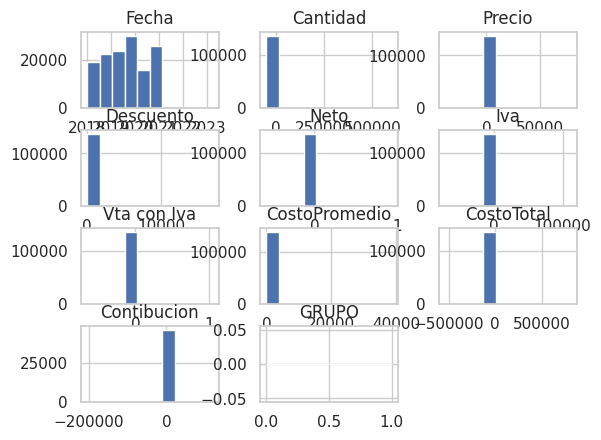

In [109]:
df.hist()

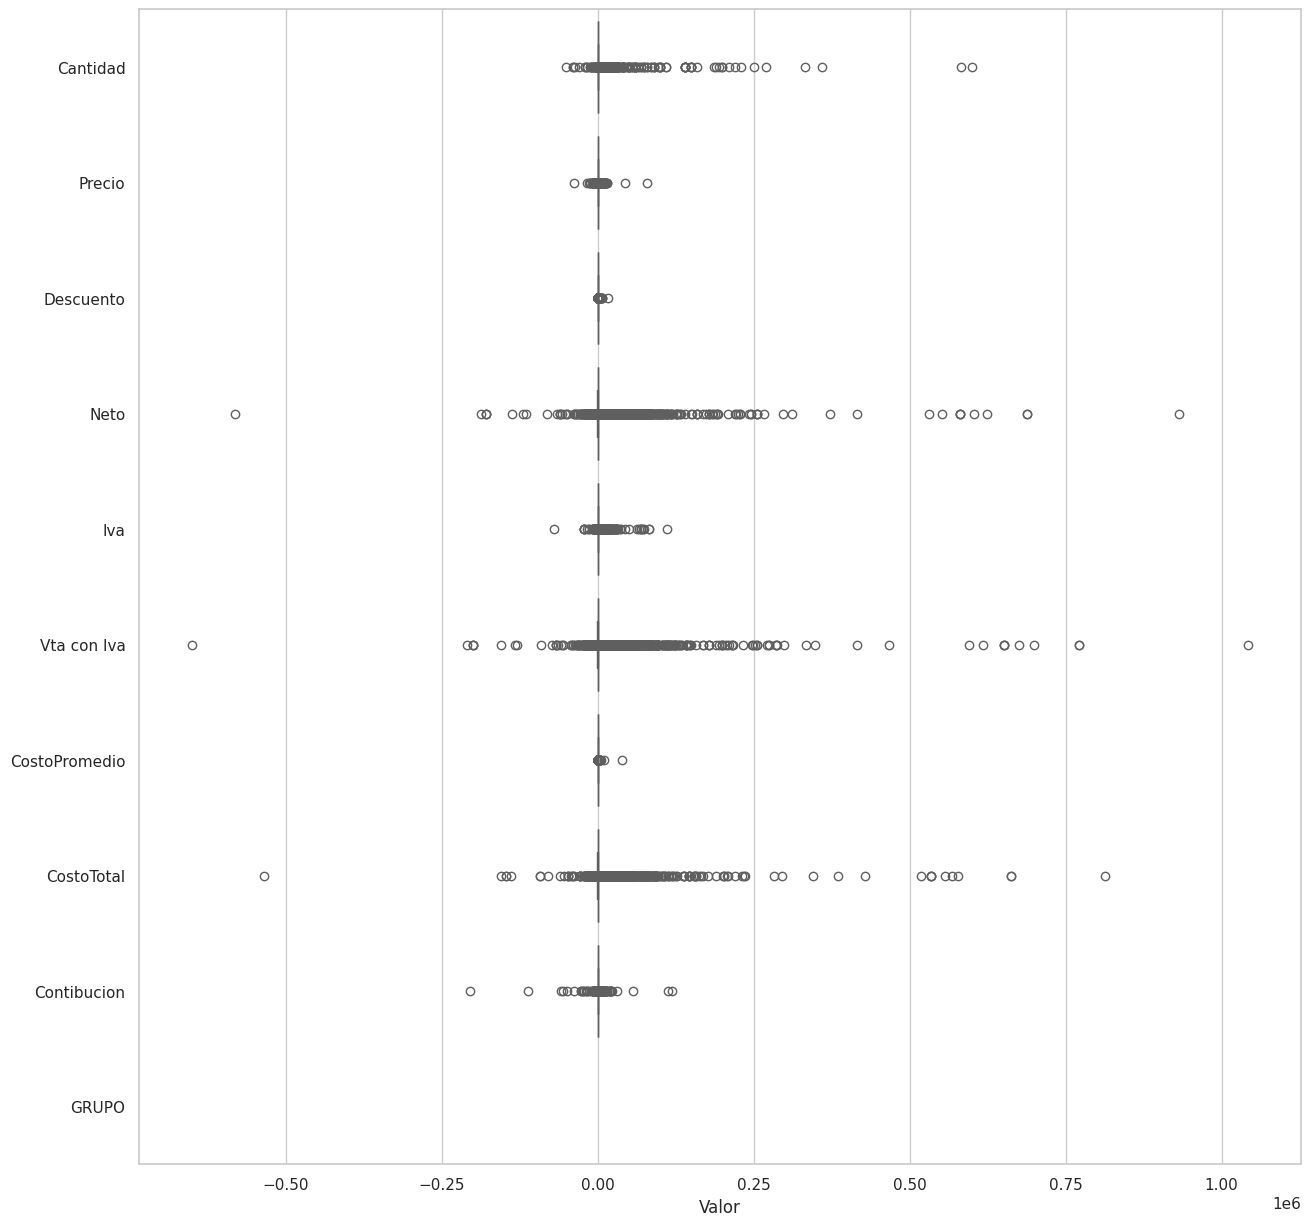

In [110]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,orient="h",palette="Set3")
plt.xlabel("Valor")
plt.show()

<Axes: >

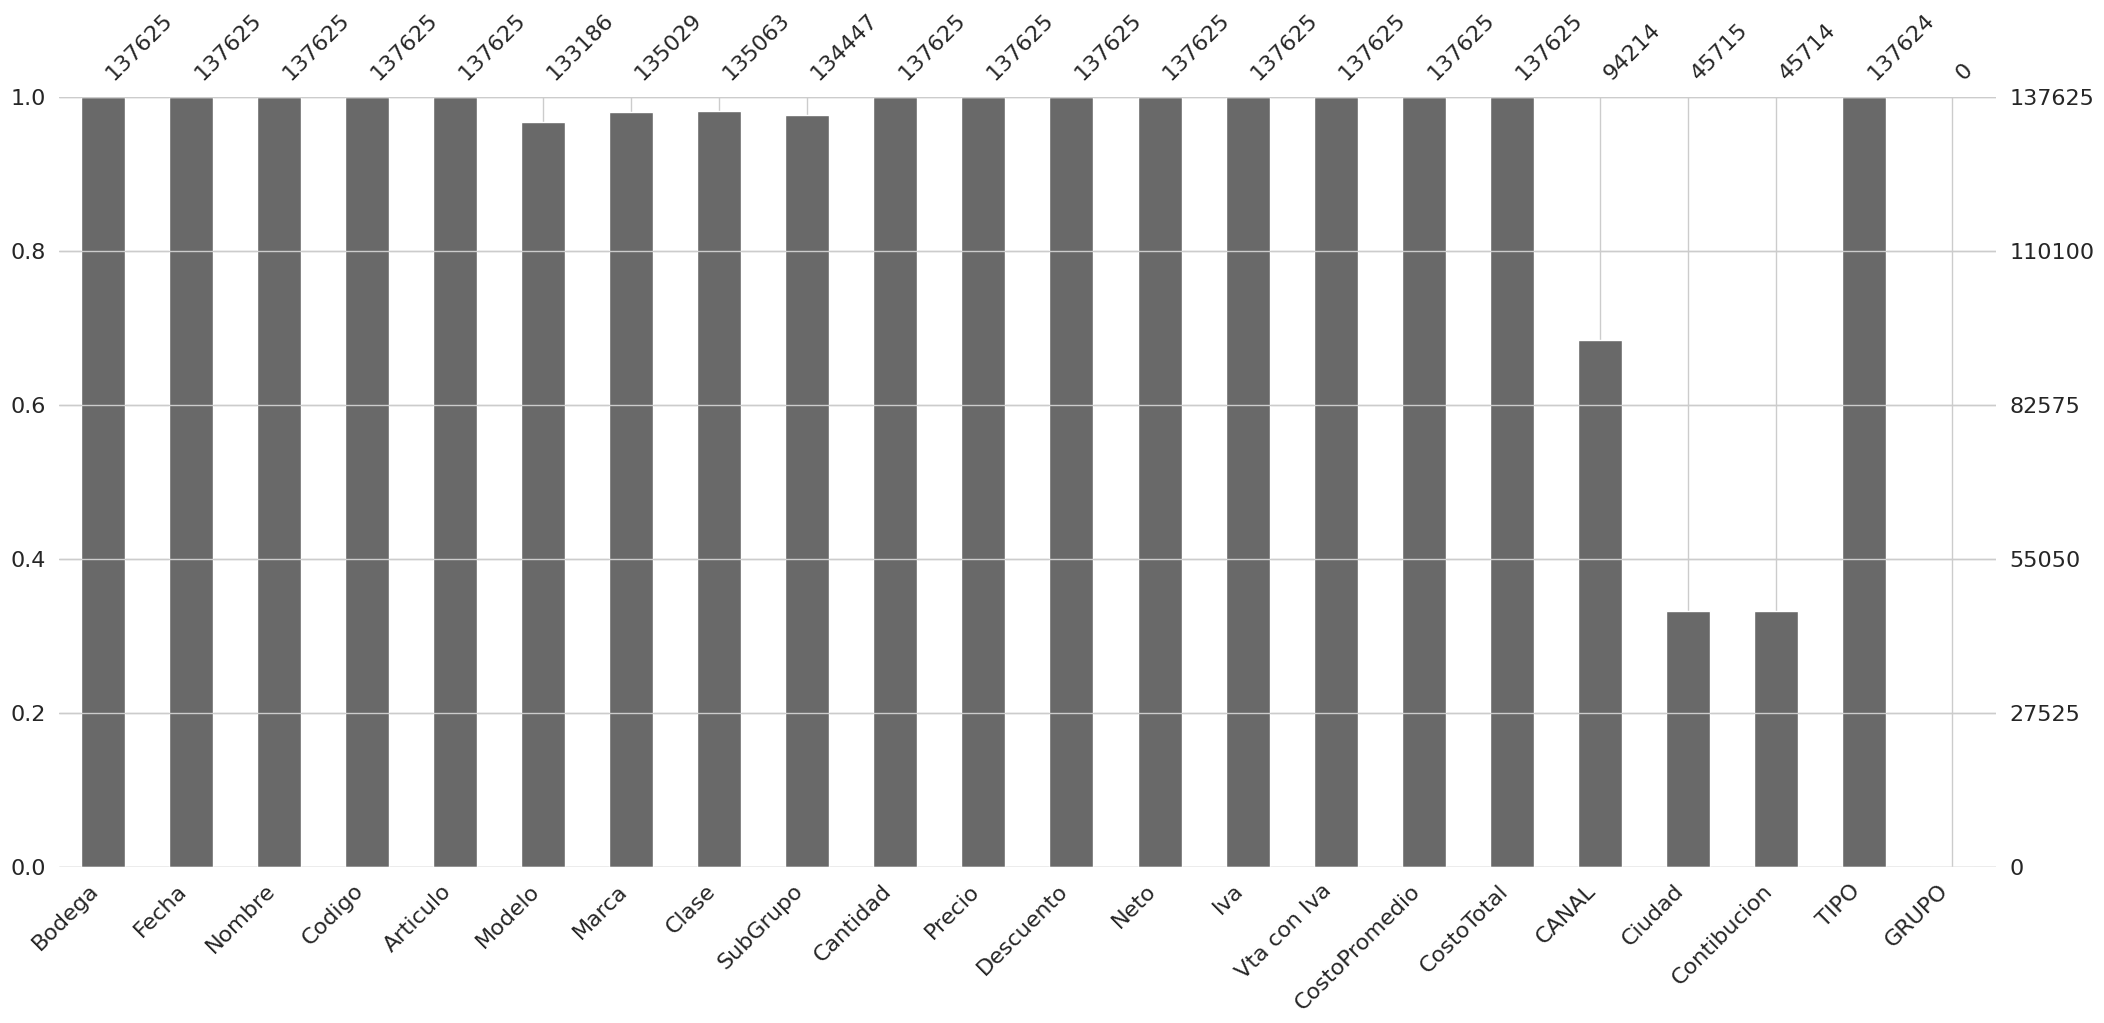

In [111]:
msno.bar(df)

<Axes: >

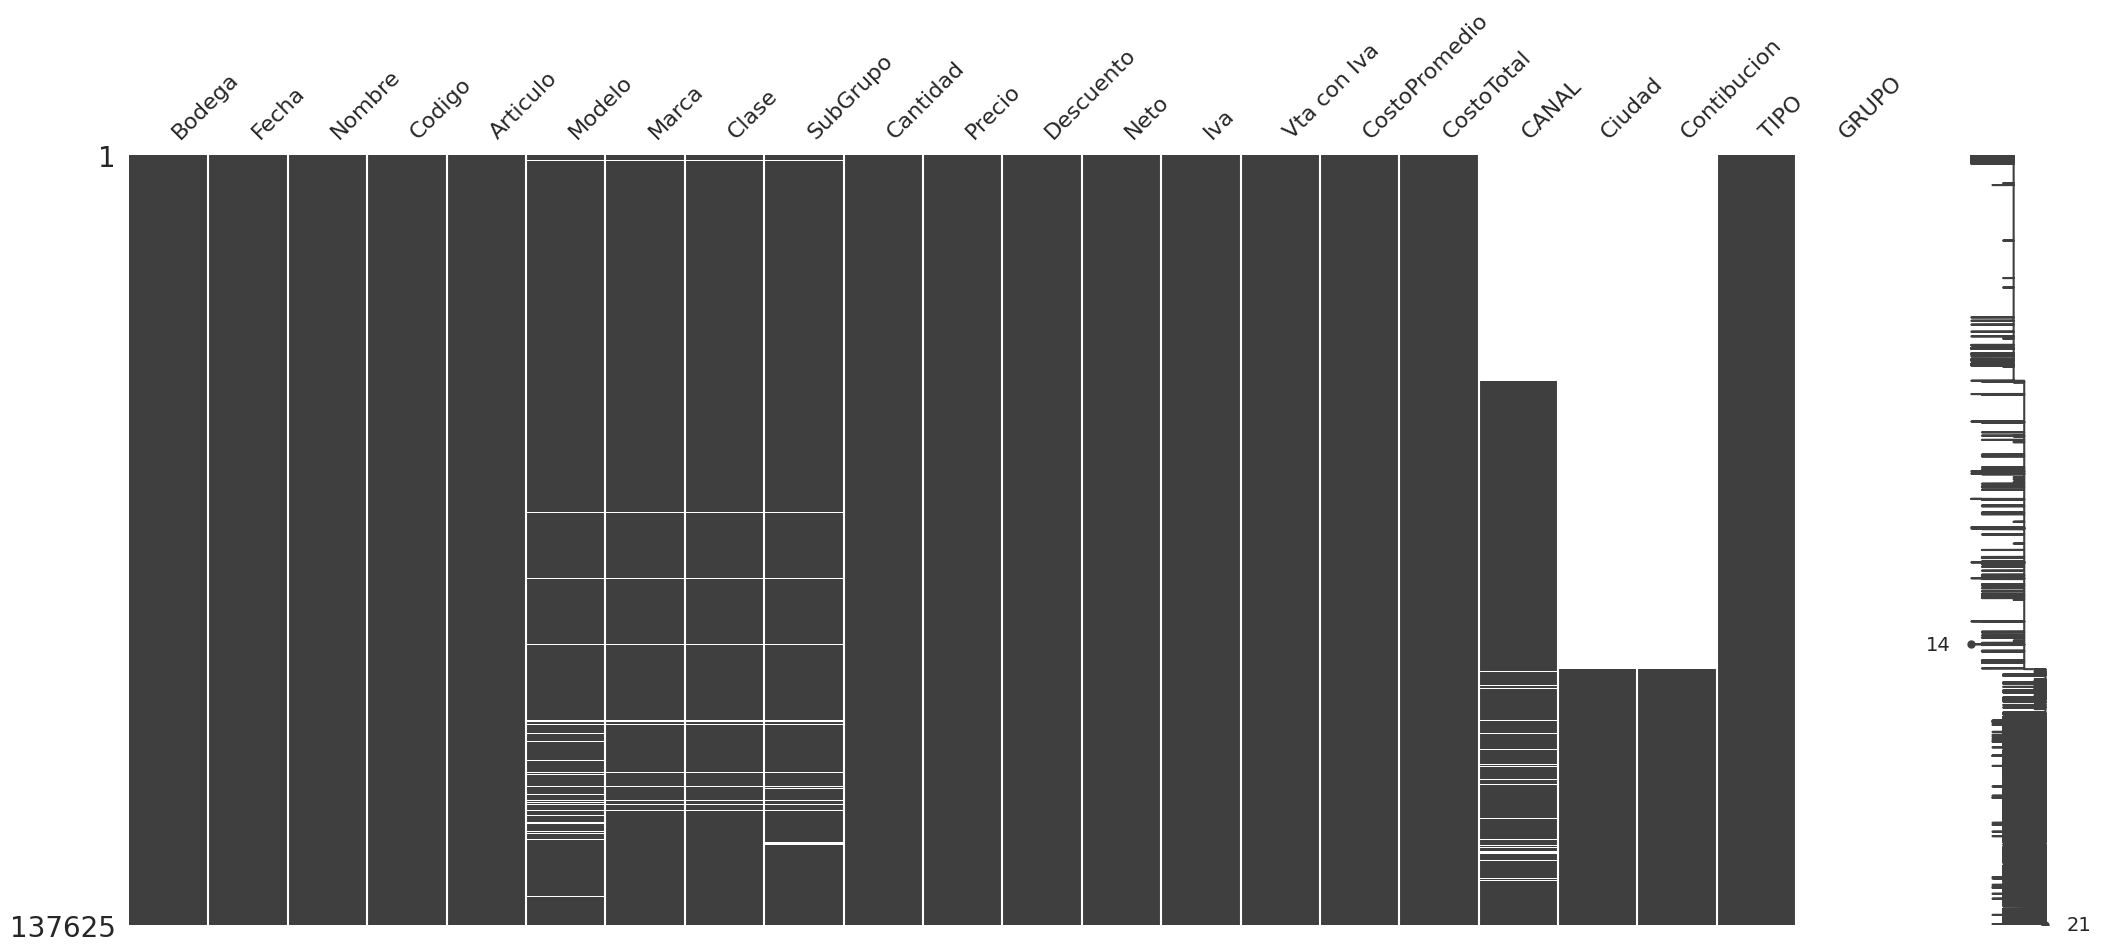

In [112]:
msno.matrix(df)

In [113]:
df = df.drop('Nombre',axis = 1)
df = df.drop('Fecha',axis = 1)
df = df.drop('Ciudad',axis = 1)
df = df.drop('Contibucion',axis = 1)
df = df.drop('GRUPO',axis = 1)
df = df.drop('TIPO',axis = 1)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137625 entries, 5712 to 272932
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Bodega         137625 non-null  object 
 1   Codigo         137625 non-null  object 
 2   Articulo       137625 non-null  object 
 3   Modelo         133186 non-null  object 
 4   Marca          135029 non-null  object 
 5   Clase          135063 non-null  object 
 6   SubGrupo       134447 non-null  object 
 7   Cantidad       137625 non-null  float64
 8   Precio         137625 non-null  float64
 9   Descuento      137625 non-null  float64
 10  Neto           137625 non-null  float64
 11  Iva            137625 non-null  float64
 12  Vta con Iva    137625 non-null  float64
 13  CostoPromedio  137625 non-null  float64
 14  CostoTotal     137625 non-null  float64
 15  CANAL          94214 non-null   object 
dtypes: float64(8), object(8)
memory usage: 17.8+ MB


In [115]:
df.isnull().sum()

Bodega               0
Codigo               0
Articulo             0
Modelo            4439
Marca             2596
Clase             2562
SubGrupo          3178
Cantidad             0
Precio               0
Descuento            0
Neto                 0
Iva                  0
Vta con Iva          0
CostoPromedio        0
CostoTotal           0
CANAL            43411
dtype: int64

In [116]:
df['Modelo'].fillna(df['Modelo'].mode()[0],inplace=True)
df['Marca'].fillna(df['Marca'].mode()[0],inplace=True)
df['Clase'].fillna(df['Clase'].mode()[0],inplace=True)
df['SubGrupo'].fillna(df['SubGrupo'].mode()[0],inplace=True)
df['CANAL'].fillna(df['CANAL'].mode()[0],inplace=True)

In [117]:
df.isnull().sum()

Bodega           0
Codigo           0
Articulo         0
Modelo           0
Marca            0
Clase            0
SubGrupo         0
Cantidad         0
Precio           0
Descuento        0
Neto             0
Iva              0
Vta con Iva      0
CostoPromedio    0
CostoTotal       0
CANAL            0
dtype: int64

<Axes: >

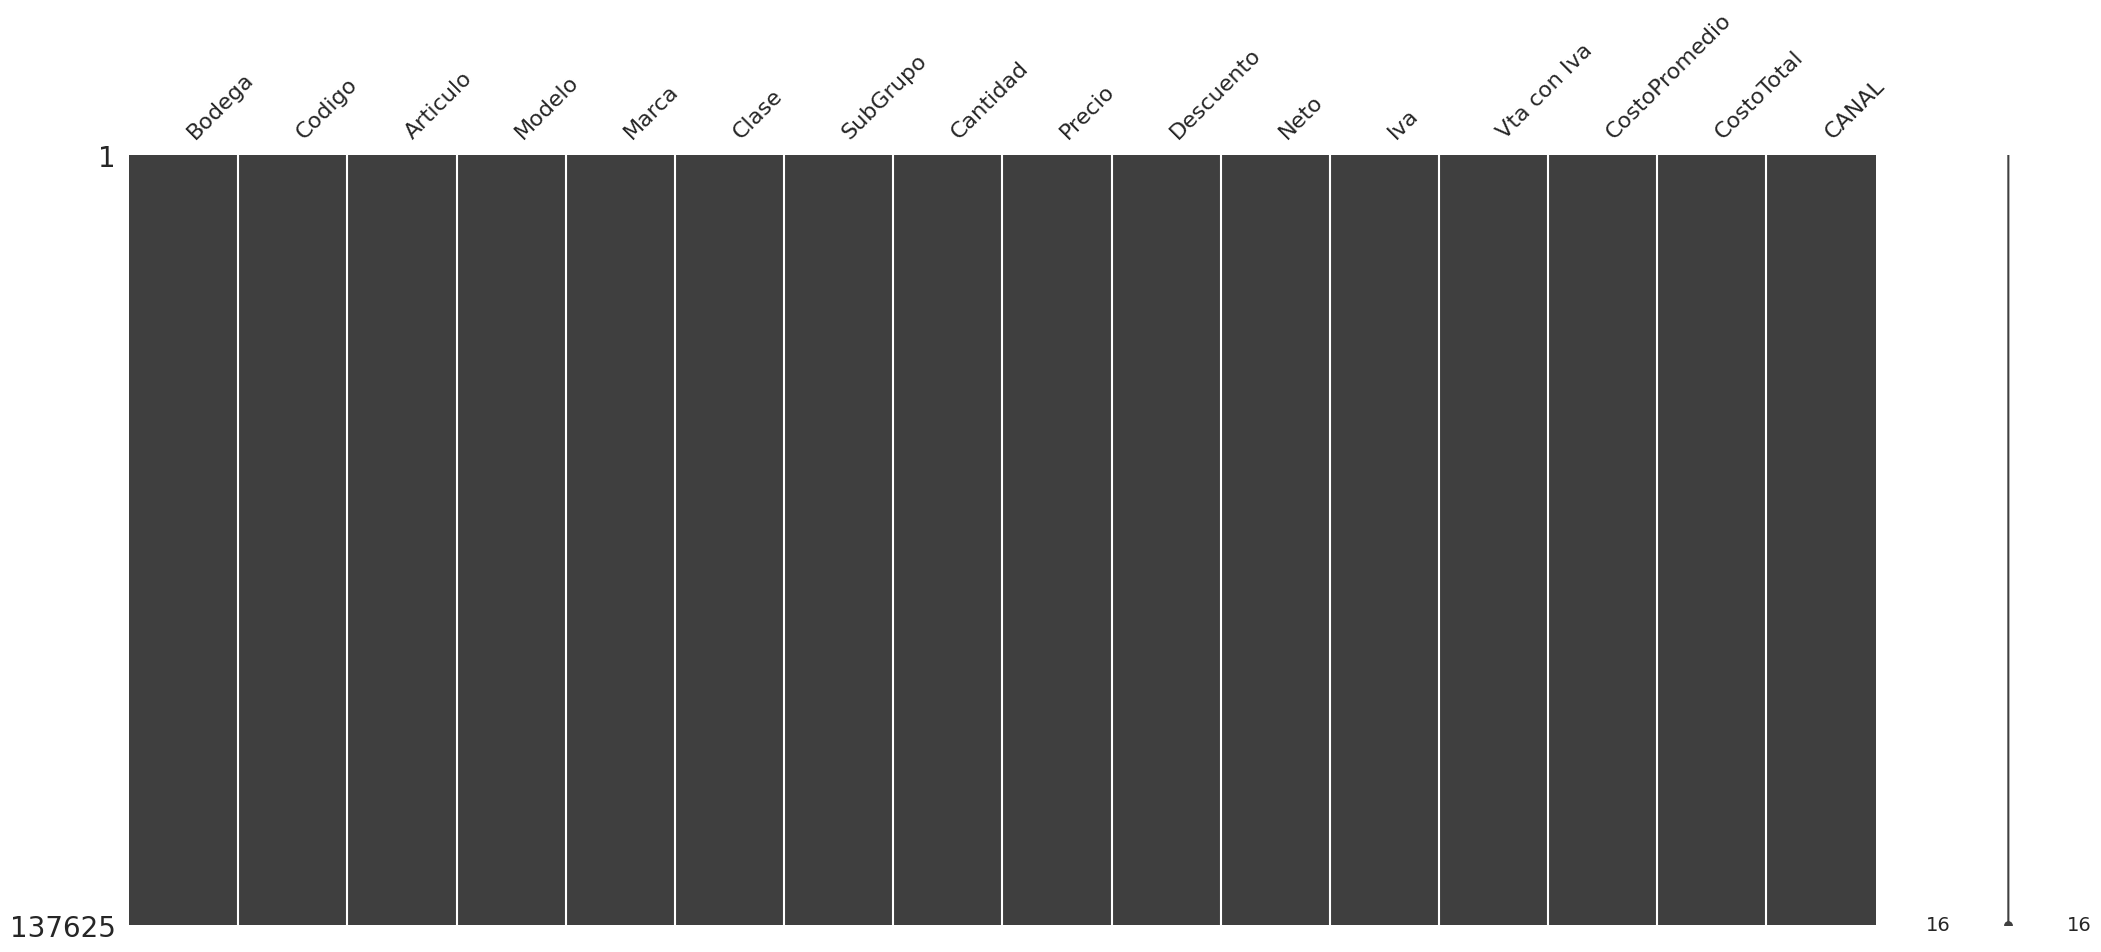

In [118]:
msno.matrix(df)

In [119]:
le = LabelEncoder()
df['Bodega'] = le.fit_transform(df['Bodega'])
df['Codigo'] = le.fit_transform(df['Codigo'])
df['Articulo'] = le.fit_transform(df['Articulo'])
df['Modelo'] = le.fit_transform(df['Modelo'])
df['Marca'] = le.fit_transform(df['Marca'])
df['Clase'] = le.fit_transform(df['Clase'])
df['SubGrupo'] = le.fit_transform(df['SubGrupo'])
df['CANAL'] = le.fit_transform(df['CANAL'])


In [120]:
col = ['Cantidad', 'Neto', 'CostoTotal']
for i in col:
  q1 = df[i].quantile(0.05)
  q4 = df[i].quantile(0.95)
  df[i][df[i]<=q1] = q1
  df[i][df[i]>=q4] = q4

<ipython-input-120-f9641e14b19c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1] = q1
<ipython-input-120-f9641e14b19c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>=q4] = q4
<ipython-input-120-f9641e14b19c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<=q1] = q1
<ipython-input-120-f9641e14b19c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


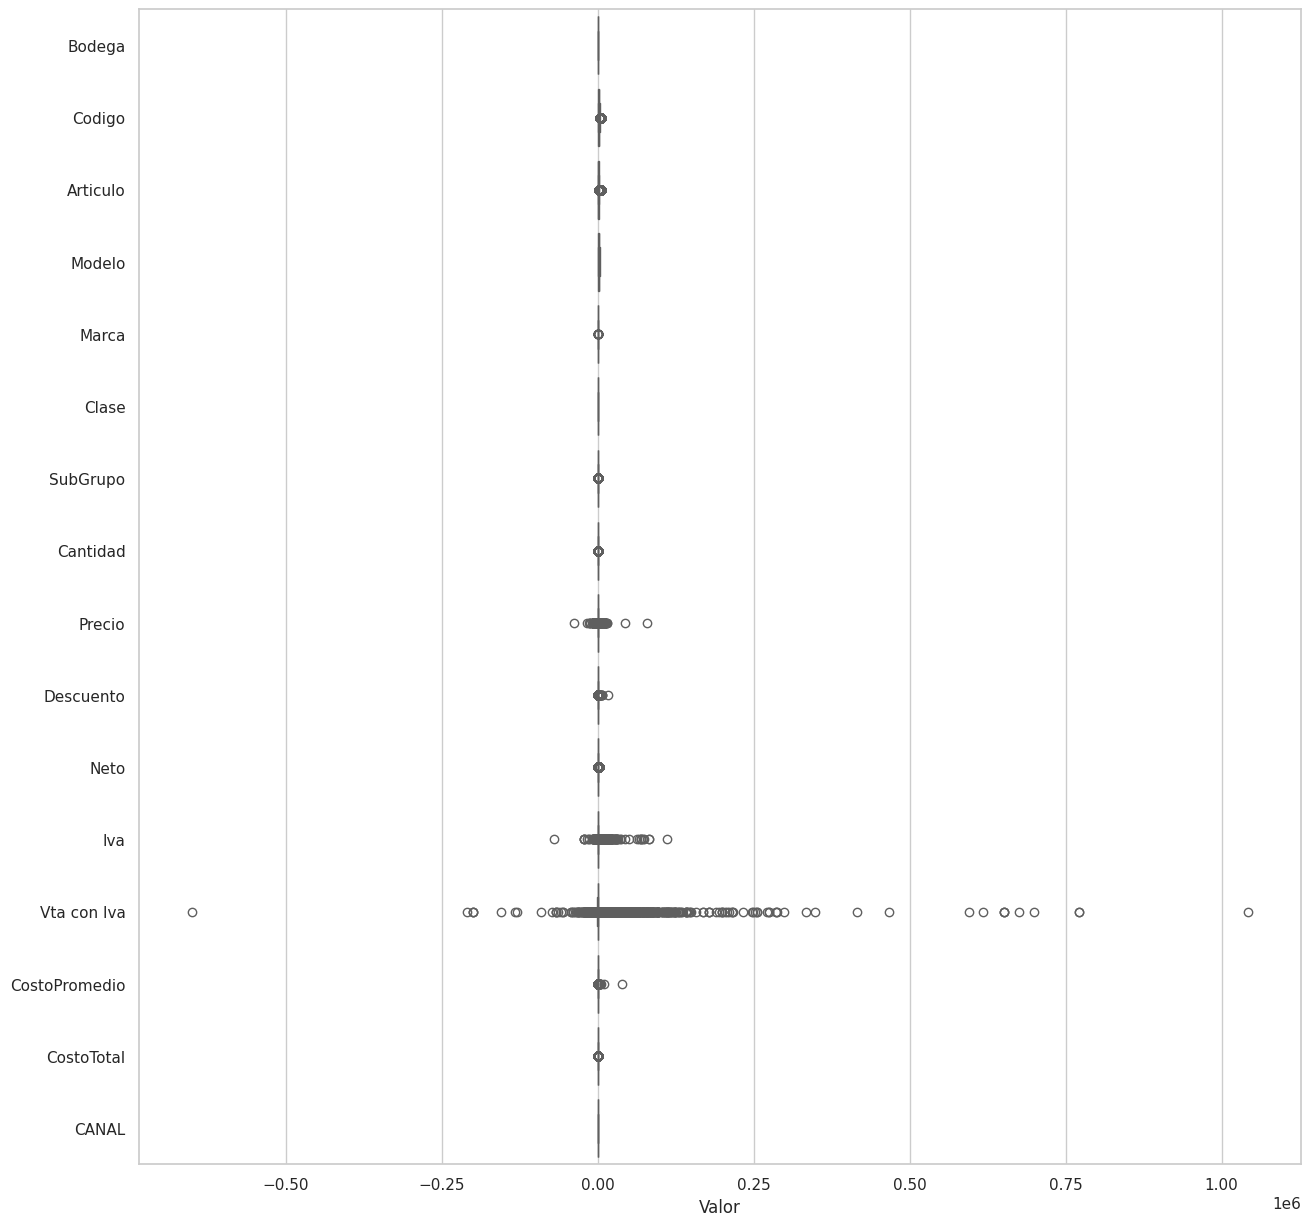

In [121]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,orient="h",palette="Set3")
plt.xlabel("Valor")
plt.show()

<Axes: >

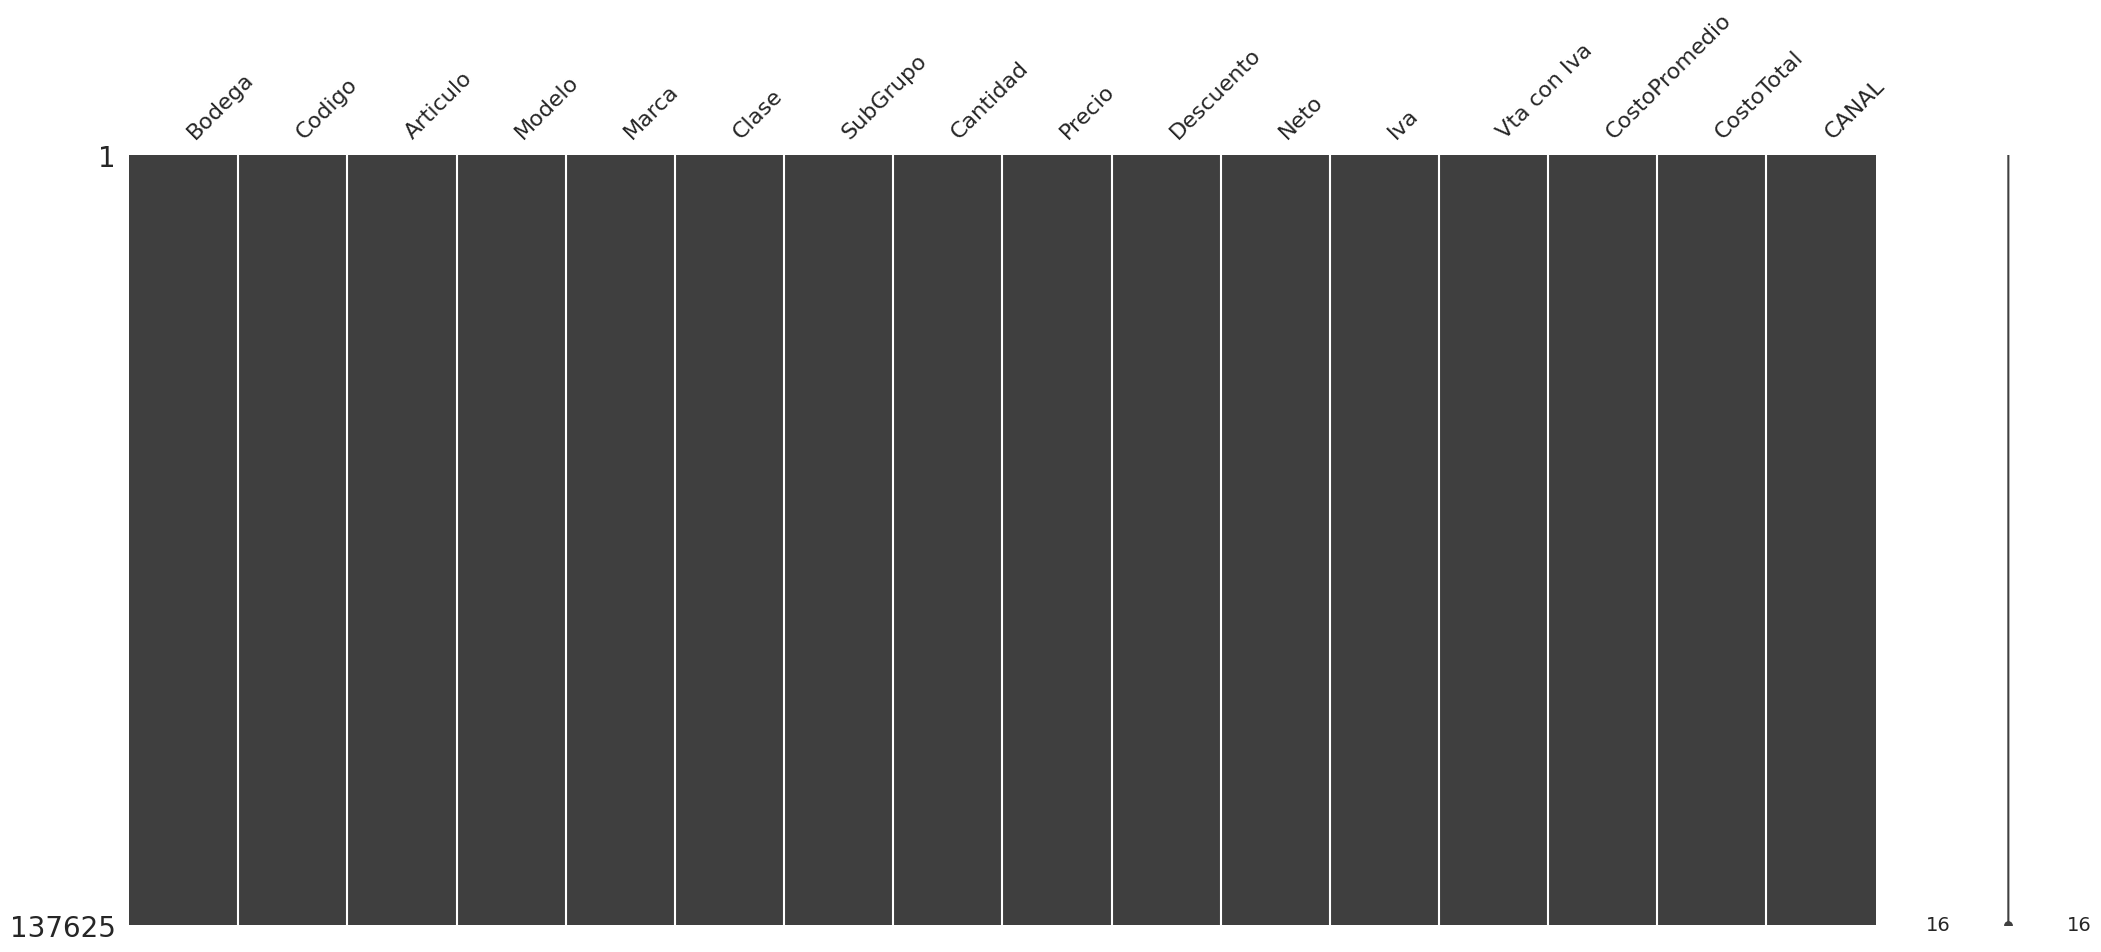

In [122]:
msno.matrix(df)

<Axes: >

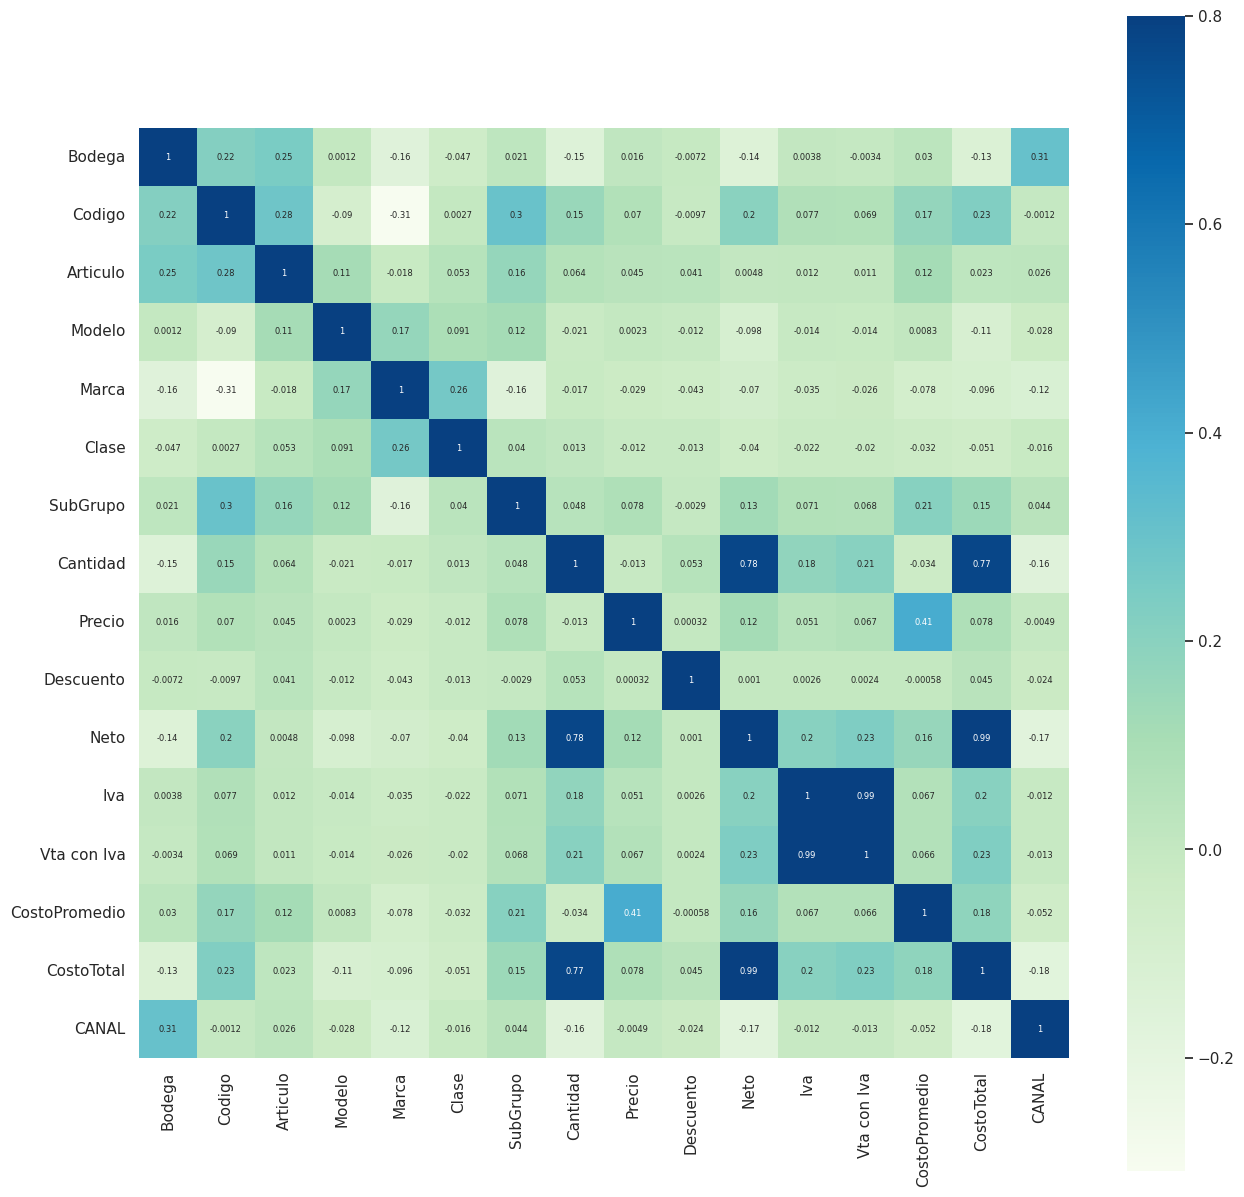

In [123]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), vmax=0.8, square=True, cmap="GnBu",linecolor="r",annot=True,annot_kws={"size": 6})


In [124]:
df = df.drop('Vta con Iva',axis = 1)

In [125]:
df = df.drop('Descuento',axis = 1)

In [126]:
X = df.drop('Neto',axis = 1)
y = df['Neto']

In [127]:
minmaxs = MinMaxScaler()
minmaxs.fit(X)
X = minmaxs.transform(X)

In [128]:
df

,Bodega,Codigo,Articulo,Modelo,Marca,Clase,SubGrupo,Cantidad,Precio,Neto,Iva,CostoPromedio,CostoTotal,CANAL
5712,0,7,2472,3135,109,363,8,1.0,6800.00,1694.8800,816.00000,0.000000,0.969100,7
5713,0,9,5298,3135,109,363,8,1.0,78912.70,1694.8800,0.00000,0.000000,0.969100,7
5714,0,0,3397,3135,109,363,8,1.0,1879.19,1694.8800,0.00000,254.360000,254.360000,7
5715,0,1,3398,3135,109,363,8,1.0,102.18,102.1800,12.26160,64.443333,64.443333,7
5716,0,7,2472,3135,109,363,8,1.0,11123.20,1694.8800,1334.78400,0.000000,0.969100,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168908,23,2216,297,1006,66,448,8,1.0,31.88,28.6920,3.44304,19.975471,19.975471,7
168909,23,236,209,484,55,263,0,1.0,7.88,3.9400,0.47280,7.507220,7.507220,7
168910,23,140,147,423,55,285,3,2.0,22.26,22.2600,2.67120,21.202500,42.405000,7
168911,23,550,2276,1259,7,263,0,2.0,9.82,9.8200,1.17840,6.908544,13.817089,7


In [158]:
def modelo(X,y):
  X_train, X_test, y_train, y_test = train_test_split(
    X,y,random_state=1000, test_size=0.3)
  red_neuronal = Sequential()

  red_neuronal.add(Dense(units = 12,activation='relu'))
  red_neuronal.add(Dense(units = 6,activation='relu'))
  red_neuronal.add(Dense(units = 1))

  red_neuronal.compile(optimizer="adam",
                       loss='mean_absolute_error')
  red_neuronal.fit(X_train,y_train,validation_data=(X_test,y_test),
                  epochs=15,batch_size=50,verbose=1)
  loss = pd.DataFrame(red_neuronal.history.history)
  plt.figure(figsize=(15,15))
  sns.lineplot(data=loss,lw=3)
  sns.despine()

  return red_neuronal, X_train, X_test, y_train, y_test

Epoch 1/15
1927/1927 [==============================] - 11s 4ms/step - loss: 193.7708 - val_loss: 125.7107
Epoch 2/15
1927/1927 [==============================] - 9s 5ms/step - loss: 64.8957 - val_loss: 39.5076
Epoch 3/15
1927/1927 [==============================] - 5s 3ms/step - loss: 29.2078 - val_loss: 23.1019
Epoch 4/15
1927/1927 [==============================] - 7s 4ms/step - loss: 21.8128 - val_loss: 21.0905
Epoch 5/15
1927/1927 [==============================] - 5s 3ms/step - loss: 21.2210 - val_loss: 20.9073
Epoch 6/15
1927/1927 [==============================] - 7s 3ms/step - loss: 21.1203 - val_loss: 20.7832
Epoch 7/15
1927/1927 [==============================] - 6s 3ms/step - loss: 21.0581 - val_loss: 20.7588
Epoch 8/15
1927/1927 [==============================] - 7s 3ms/step - loss: 21.0106 - val_loss: 20.6881
Epoch 9/15
1927/1927 [==============================] - 6s 3ms/step - loss: 20.9600 - val_loss: 20.7196
Epoch 10/15
1927/1927 [==============================] - 11s 

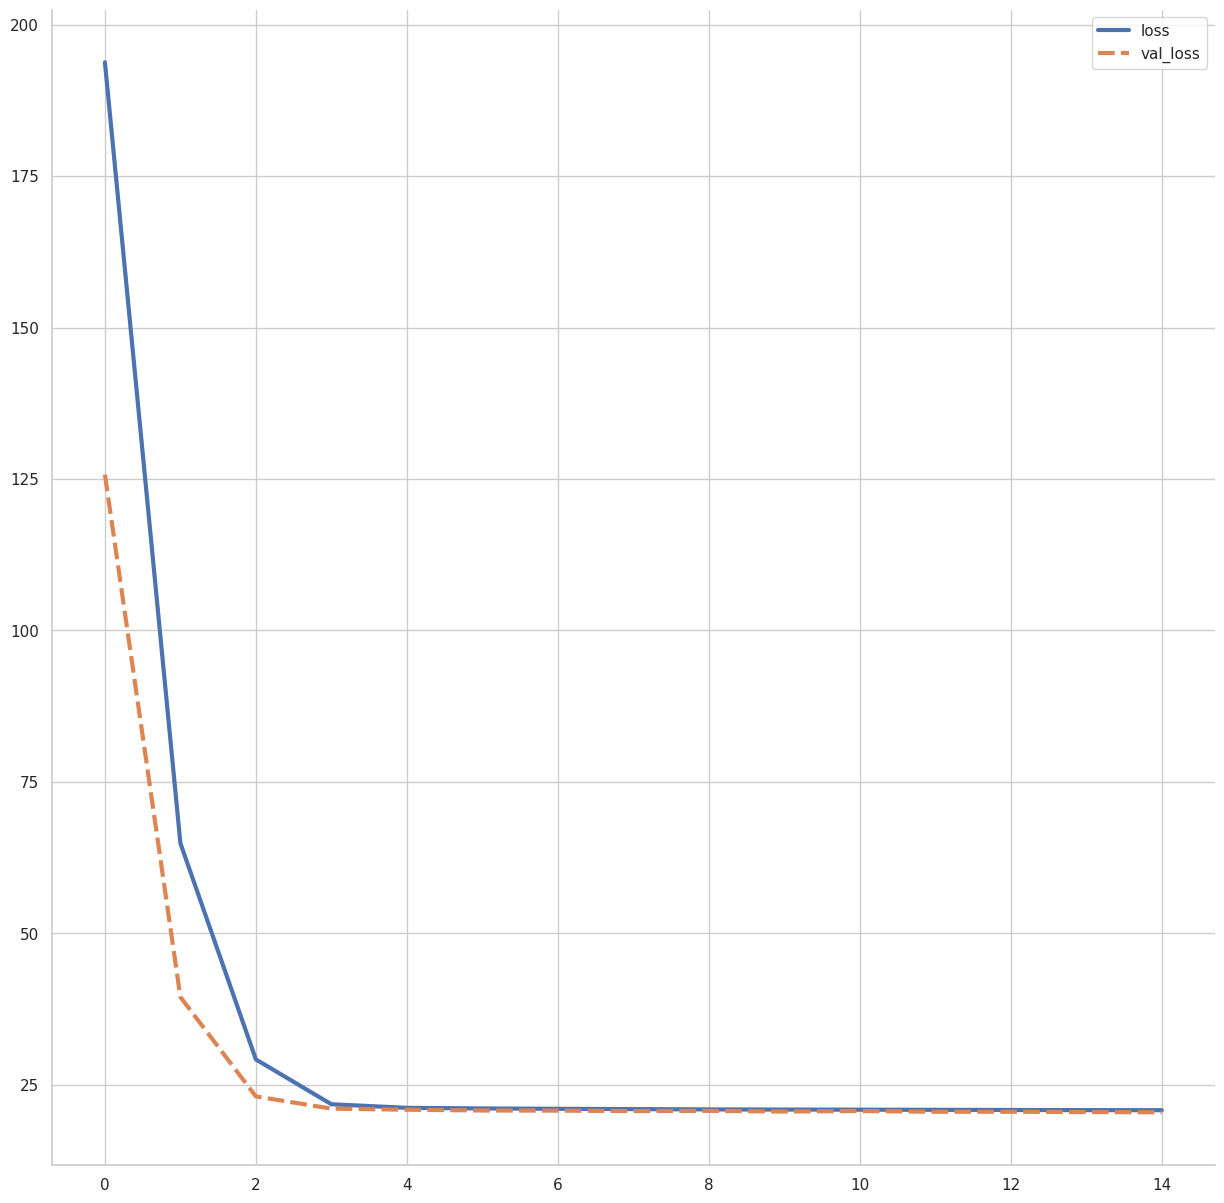

In [159]:
red_neuronal, X_train, X_test, y_train, y_test = modelo(X,y)

In [160]:
red_neuronal.save("ann.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [162]:
import joblib

joblib.dump(minmaxs, 'minmaxs.pkl')

['minmaxs.pkl']